# The Sparks Foundation

## Data Science and Bussiness Analytics intern

### Name - Omprakash Verma

### Task 2: Prediction using Unsupervised ML

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline 

In [2]:
# Importing the dataset
url = 'https://bit.ly/3kXTdox'
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
x = df.iloc[:, [0,1,2,3]].values
x[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
#Let’s see the number of groups that the Iris dataset has
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

There are 3 different clusters in the Dataset and we have 4 features that we can feed the K-Means model.

Using K-Means Elbow method for optimal k

In [5]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

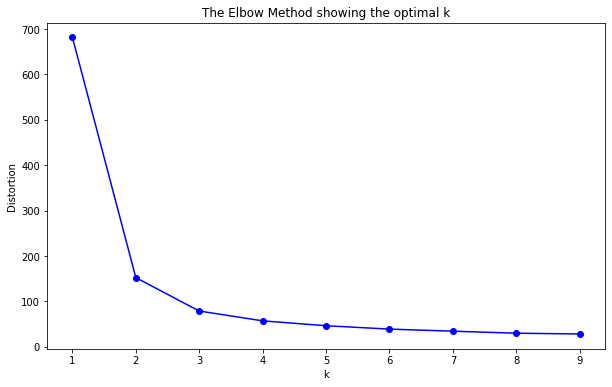

In [6]:
#Plotting the distortions of K-Means
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')  #no of clusters
plt.ylabel('Distortion')  #within cluster sum of squares
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the 'elbow' is the number 3 which is optimal for this case, so k=3

In [7]:
#Applying kmeans to the datasets
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
y_kmeans = kmeanModel.predict(x)
y_target = iris['target']

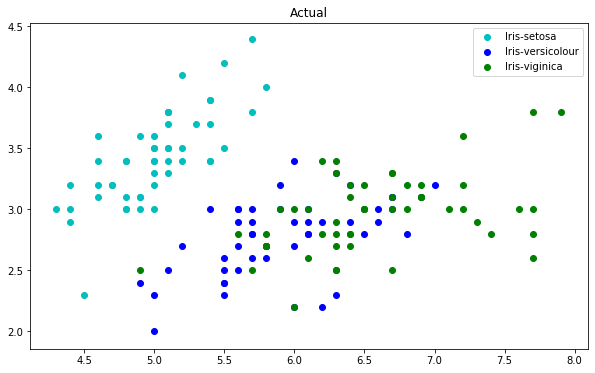

In [9]:
#visualising the clusters on the first two columns for Actual
plt.figure(figsize=(10,6))
plt.scatter(x[y_target==0, 0], x[y_target==0, 1], color='c', label='Iris-setosa')
plt.scatter(x[y_target==1, 0], x[y_target==1, 1], color='b' , label='Iris-versicolour')
plt.scatter(x[y_target==2, 0], x[y_target==2, 1], color='g', label='Iris-viginica')


plt.title('Actual')
plt.legend()
plt.show()

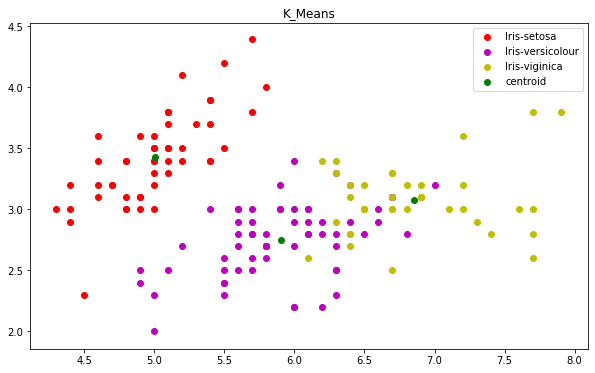

In [10]:
#visualising the clusters on the first two columns for K_means
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], color='r', label='Iris-setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], color='m' , label='Iris-versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], color='y', label='Iris-viginica')

#plotting the centroids of the clusters
plt.scatter(kmeanModel.cluster_centers_[:,0],kmeanModel.cluster_centers_[:,1], color='g', label='centroid')

plt.title('K_Means')
plt.legend()
plt.show()